In [69]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import datasets

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [70]:
df = pd.read_excel(r'act postcodes.xlsx')
df.head()

,districs,Suburbs,postcodes,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population
0,North Canberra,Acton,2601,149.1194,-35.2794,925,13.3
1,North Canberra,Ainslie,2602,149.1442,-35.2628,925,13.3
2,South Canberra,Barton,2600,149.1344,-35.3078,1376,6.8
3,North Canberra,Braddon,2612,149.1356,-35.2719,925,13.3
4,North Canberra,Campbell - Duntroon,2612,149.1617,-35.3032,925,13.3


In [3]:
address = 'Canberra, ACT'

geolocator = Nominatim(user_agent="Canberra_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Canberra are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Canberra are -35.2975906, 149.1012676.


In [71]:
# create map of Canberra using latitude and longitude values
map_canberra = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['districs'], df['Suburbs']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canberra)  
    
map_canberra

In [4]:
CLIENT_ID = 'HJ2CYGT1M0FJILE1JZCCPCHTSC44N3L0E12CGVRIJ5MV4YAG' # your Foursquare ID
CLIENT_SECRET = 'KPV44XIEL2T340TNIDMMLPMLESLEGTCZRBODHGW2HYLNAAHE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HJ2CYGT1M0FJILE1JZCCPCHTSC44N3L0E12CGVRIJ5MV4YAG
CLIENT_SECRET:KPV44XIEL2T340TNIDMMLPMLESLEGTCZRBODHGW2HYLNAAHE


In [5]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [6]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 750 # define radius
venues = getNearbyVenues(names=df['Suburbs'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Acton 
Ainslie 
Barton 
Braddon 
Campbell - Duntroon 
Capital Hill 
City (also referred to as Civic) 
Deakin 
Dickson - Dickson Centre 
Downer 
Forrest 
Fyshwick 
Griffith - Manuka 
Hackett
Kingston - The Causeway
Lyneham - North Lyneham 
Narrabundah 
O'Connor 
Parkes 
Red Hill 
Reid 
Russell
Turner 
Watson
Yarralumla
Aranda 
Belconnen - Belconnen Town Centre - Emu Ridge
Bruce 
Charnwood 
Cook 
Dunlop
Evatt
Florey 
Flynn 
Fraser 
Giralang 
Hawker 
Higgins 
Holt - Kippax Centre
Kaleen
Latham 
Lawson 
Macgregor 
Macquarie - Jamison Centre 
McKellar
Melba 
Page
Scullin 
Spence 
Weetangera 
Amaroo 
Bonner 
Casey 
Crace 
Forde 
Franklin
Gungahlin - Gungahlin Town Centre 
Harrison 
Jacka 
Mitchell
Moncrieff
Ngunnawal 
Nicholls 
Palmerston 
Taylor 
Throsby 
Beard
Hume
Oaks Estate 
Symonston
Canberra Airport
Pialligo 
Denman Prospect
Coombs
Wright
Banks 
Bonython 
Calwell 
Chisholm 
Conder
Fadden 
Gilmore 
Gordon 
Gowrie
Greenway - Tuggeranong Town Centre 
Isabella Plains
Kambah - Kambah Villa

In [7]:
print(venues.shape)
venues.head()

(3464, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acton,-35.2794,149.1194,Llewellyn Hall,-35.280604,149.123442,Concert Hall
1,Acton,-35.2794,149.1194,Group Seven Espresso,-35.281864,149.124639,Coffee Shop
2,Acton,-35.2794,149.1194,The Cupping Room,-35.280472,149.126106,Coffee Shop
3,Acton,-35.2794,149.1194,Harvest,-35.278223,149.126675,Coffee Shop
4,Acton,-35.2794,149.1194,Two Before Ten,-35.279753,149.126229,Café


In [8]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acton,95,95,95,95,95,95
Ainslie,92,92,92,92,92,92
Amaroo,36,36,36,36,36,36
Aranda,30,30,30,30,30,30
Banks,5,5,5,5,5,5
Barton,92,92,92,92,92,92
Beard,7,7,7,7,7,7
Belconnen - Belconnen Town Centre - Emu Ridge,1,1,1,1,1,1
Bonner,11,11,11,11,11,11


In [9]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 206 uniques categories.


In [10]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Neighborhood,Airport,Airport Lounge,Airport Service,Animal Shelter,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach,Beer Bar,Bistro,Bookstore,Border Crossing,Botanical Garden,Bowling Alley,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Cantonese Restaurant,Child Care Service,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Costume Shop,Creperie,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lake,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Motorsports Shop,Mountain,Multiplex,Museum,Music Venue,Nature Preserve,Newsstand,Noodle House,North Indian Restaurant,Organic Grocery,Outdoor Sculpture,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Post Office,Pub,Public Art,Racecourse,Record Shop,Restaurant,River,Rugby Pitch,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Shipping Store,Shopping Mall,Shopping Plaza,Skating Rink,Soccer Field,Social Club,South Indian Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Taxi Stand,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Winery,Yoga Studio,Zoo
0,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
venues_onehot.shape

(3464, 207)

In [12]:
venues_grouped = venues_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped.head()

,Neighborhood,Airport,Airport Lounge,Airport Service,Animal Shelter,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach,Beer Bar,Bistro,Bookstore,Border Crossing,Botanical Garden,Bowling Alley,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Cantonese Restaurant,Child Care Service,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Costume Shop,Creperie,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lake,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Motorsports Shop,Mountain,Multiplex,Museum,Music Venue,Nature Preserve,Newsstand,Noodle House,North Indian Restaurant,Organic Grocery,Outdoor Sculpture,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Post Office,Pub,Public Art,Racecourse,Record Shop,Restaurant,River,Rugby Pitch,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Shipping Store,Shopping Mall,Shopping Plaza,Skating Rink,Soccer Field,Social Club,South Indian Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Taxi Stand,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Winery,Yoga Studio,Zoo
0,Acton,0,0,0,0,0,0,1,0,2,0,0,0,1,0,3,0,0,0,1,0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,13,0,0,0,1,1,0,0,1,9,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,4,1,0,1,1,0,0,0,3,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,2,0,0,0
1,Ainslie,0,0,0,0,0,0,3,0,2,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,1,1,0,12,0,0,0,3,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,6,0,0,1,1,0,0,0,2,0,0,1,0,0,0,0,3,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,2,1,0,0,1,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,2,0,0,0,0,2,0,1,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,2,0,3,0,0,0,0,0,0,0,0
2,Amaroo,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [13]:
num_top_venues = 10

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acton ----
                   venue  freq
0                   Café  13.0
1            Coffee Shop   9.0
2                   Park   4.0
3                  Hotel   4.0
4     Italian Restaurant   3.0
5                    Bar   3.0
6         History Museum   2.0
7               Wine Bar   2.0
8  Australian Restaurant   2.0
9           Burger Joint   2.0


----Ainslie ----
                   venue  freq
0                   Café  12.0
1                  Hotel   6.0
2           Liquor Store   3.0
3  Vietnamese Restaurant   3.0
4     Chinese Restaurant   3.0
5          Grocery Store   3.0
6                    Bar   3.0
7            Coffee Shop   3.0
8       Asian Restaurant   3.0
9  Australian Restaurant   2.0


----Amaroo ----
                  venue  freq
0           Supermarket   4.0
1                  Café   4.0
2         Grocery Store   2.0
3  Fast Food Restaurant   2.0
4      Asian Restaurant   2.0
5        Shopping Plaza   2.0
6           Coffee Shop   1.0
7      Business Service   

In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [15]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,Café,Coffee Shop,Park,Hotel,Bar,Italian Restaurant,Wine Bar,Restaurant,History Museum,Burger Joint
1,Ainslie,Café,Hotel,Coffee Shop,Grocery Store,Liquor Store,Asian Restaurant,Vietnamese Restaurant,Chinese Restaurant,Bar,Thai Restaurant
2,Amaroo,Café,Supermarket,Shopping Plaza,Grocery Store,Asian Restaurant,Fast Food Restaurant,Gas Station,Shopping Mall,Business Service,Bus Stop
3,Aranda,Café,Gym,Liquor Store,Bakery,Market,Bar,Outdoor Sculpture,Donut Shop,Nature Preserve,Chinese Restaurant
4,Banks,Garden,Playground,Hill,Park,Ethiopian Restaurant,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [16]:
venues_grouped.columns.values.tolist()

['Neighborhood',
 'Airport',
 'Airport Lounge',
 'Airport Service',
 'Animal Shelter',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Australian Restaurant',
 'Auto Dealership',
 'Auto Garage',
 'Auto Workshop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Stadium',
 'Beach',
 'Beer Bar',
 'Bistro',
 'Bookstore',
 'Border Crossing',
 'Botanical Garden',
 'Bowling Alley',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Buffet',
 'Building',
 'Burger Joint',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Cafeteria',
 'Café',
 'Campground',
 'Cantonese Restaurant',
 'Child Care Service',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Costume Shop',
 'Creperie',
 'Cricket Ground',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Dim Sum Restaurant',
 'Diner',
 

In [17]:

total_restaurants = venues_grouped['Vietnamese Restaurant']+venues_grouped['Vegetarian / Vegan Restaurant']+\
venues_grouped['Turkish Restaurant']+venues_grouped['Thai Restaurant']+venues_grouped['Tapas Restaurant']+\
venues_grouped['Szechuan Restaurant']+venues_grouped['Sushi Restaurant']+venues_grouped['Steakhouse']+\
venues_grouped['Sandwich Place']+venues_grouped['Doner Restaurant']+\
venues_grouped['Restaurant']+venues_grouped['Pizza Place']+venues_grouped['Persian Restaurant']+\
venues_grouped['North Indian Restaurant']+venues_grouped['Noodle House']+venues_grouped['Molecular Gastronomy Restaurant']+\
venues_grouped['Mexican Restaurant']+venues_grouped['Mediterranean Restaurant']+venues_grouped['Malay Restaurant']+\
venues_grouped['Korean Restaurant']+venues_grouped['Japanese Restaurant']+venues_grouped['Italian Restaurant']+\
venues_grouped['Indian Restaurant']+venues_grouped['Hot Dog Joint']+venues_grouped['Fried Chicken Joint']+\
venues_grouped['French Restaurant']+venues_grouped['Food Truck']+venues_grouped['Food Court']+\
venues_grouped['Food & Drink Shop']+venues_grouped['Fish & Chips Shop']+venues_grouped['Fast Food Restaurant']+\
venues_grouped['Ethiopian Restaurant']+venues_grouped['Dumpling Restaurant']+venues_grouped['Gastropub']+\
venues_grouped['Dim Sum Restaurant']+venues_grouped['Chinese Restaurant']+venues_grouped['Cantonese Restaurant']+\
venues_grouped['Australian Restaurant']+venues_grouped['Burger Joint']+venues_grouped['Buffet']+\
venues_grouped['Asian Restaurant']+venues_grouped['Middle Eastern Restaurant']

In [18]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants})

In [19]:
df_restaurants.head(10)

,Neighborhood,Total Restaurants
0,Acton,25
1,Ainslie,33
2,Amaroo,9
3,Aranda,5
4,Banks,0
5,Barton,26
6,Beard,1
7,Belconnen - Belconnen Town Centre - Emu Ridge,1
8,Bonner,3
9,Bonython,1


In [20]:
df_restaurants.rename(columns={'Neighborhood': 'Suburbs'}, inplace=True)

In [21]:
df_restaurants.head()

,Suburbs,Total Restaurants
0,Acton,25
1,Ainslie,33
2,Amaroo,9
3,Aranda,5
4,Banks,0


In [22]:
# Create the final data frame that will be analyzed using clustering
df_final = pd.merge(df,df_restaurants,on='Suburbs')
column_names = ["postcodes","districs","Suburbs","Longitude","Latitude","Median weekly personal income(A$)","Percentage of the ACT population","Total Restaurants"]
df_final = df_final.reindex(columns=column_names)
df_final.head()

,postcodes,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
0,2601,North Canberra,Acton,149.1194,-35.2794,925,13.3,25
1,2602,North Canberra,Ainslie,149.1442,-35.2628,925,13.3,33
2,2600,South Canberra,Barton,149.1344,-35.3078,1376,6.8,26
3,2612,North Canberra,Braddon,149.1356,-35.2719,925,13.3,26
4,2612,North Canberra,Campbell - Duntroon,149.1617,-35.3032,925,13.3,11


In [23]:
#Drop columns that wont be used for clustering
df_final1=df_final.drop(["postcodes",'districs',"Longitude","Latitude"],axis=1)

In [24]:
df_final1.head()

,Suburbs,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
0,Acton,925,13.3,25
1,Ainslie,925,13.3,33
2,Barton,1376,6.8,26
3,Braddon,925,13.3,26
4,Campbell - Duntroon,925,13.3,11


In [25]:
from sklearn.preprocessing import StandardScaler

X = df_final1.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.57235141, -0.13376426,  1.7928094 ],
       [-0.57235141, -0.13376426,  2.66946951],
       [ 2.8455758 , -0.98573206,  1.90239192],
       [-0.57235141, -0.13376426,  1.90239192],
       [-0.57235141, -0.13376426,  0.25865422],
       [ 2.8455758 , -0.98573206,  2.12155694],
       [-0.57235141, -0.13376426,  1.7928094 ],
       [ 2.8455758 , -0.98573206,  2.66946951],
       [-0.57235141, -0.13376426,  1.13531432],
       [-0.57235141, -0.13376426,  1.02573181],
       [ 2.8455758 , -0.98573206,  1.57364438],
       [ 2.8455758 , -0.98573206, -0.17967583],
       [ 2.8455758 , -0.98573206,  2.66946951],
       [-0.57235141, -0.13376426, -0.83717091],
       [ 2.8455758 , -0.98573206,  2.45030448],
       [-0.57235141, -0.13376426,  1.13531432],
       [ 2.8455758 , -0.98573206,  1.02573181],
       [-0.57235141, -0.13376426,  2.12155694],
       [ 2.8455758 , -0.98573206,  1.24489684],
       [ 2.8455758 , -0.98573206,  1.02573181],
       [-0.57235141, -0.13376426,  1.902

In [52]:
num_clusters = 6

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[4 4 2 4 0 2 4 2 4 4 2 2 2 0 2 4 2 4 2 2 4 0 4 0 2 1 1 5 1 1 1 1 5 1 1 1 1
 1 1 5 1 5 5 1 5 5 1 1 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3
 1 1 1 1 1 5 1 1 5 1 1 1 1 5 5 1 1 5 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0]


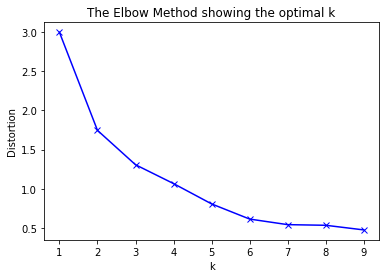

In [56]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(cluster_dataset)
    #kmeanModel.fit(grouped_clustering)
    distortions.append(sum(np.min(cdist(cluster_dataset, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / cluster_dataset.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [33]:
#Use silhouette score
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,7))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(cluster_dataset)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_dataset, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5788598355306339)
For n_clusters = 3, silhouette score is 0.4677737357652499)
For n_clusters = 4, silhouette score is 0.5439177541173013)
For n_clusters = 5, silhouette score is 0.5438416173267931)
For n_clusters = 6, silhouette score is 0.5321606807625476)


In [57]:
df_final1["Cluster Labels"] = labels
df_final1.head(5)

,Suburbs,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants,Cluster Labels
0,Acton,925,13.3,25,4
1,Ainslie,925,13.3,33,4
2,Barton,1376,6.8,26,2
3,Braddon,925,13.3,26,4
4,Campbell - Duntroon,925,13.3,11,0


In [58]:
df_final1.groupby('Cluster Labels').mean()

,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
Cluster Labels,,,
0,1015.741935,11.608065,5.258065
1,935.137931,22.944828,2.551724
2,1376.000000,6.800000,22.000000
3,937.529412,3.290000,3.352941
4,925.000000,13.300000,25.300000
5,932.846154,23.123077,13.076923


In [59]:
venues_merged = df_final.loc[:,'postcodes':'Latitude']
venues_merged.head()

,postcodes,districs,Suburbs,Longitude,Latitude
0,2601,North Canberra,Acton,149.1194,-35.2794
1,2602,North Canberra,Ainslie,149.1442,-35.2628
2,2600,South Canberra,Barton,149.1344,-35.3078
3,2612,North Canberra,Braddon,149.1356,-35.2719
4,2612,North Canberra,Campbell - Duntroon,149.1617,-35.3032


In [60]:
# merge canberra_grouped with canberra_data to add latitude/longitude for each suburbs
venues_merged = venues_merged.join(df_final1.set_index('Suburbs'), on='Suburbs')
venues_merged.head(10)

,postcodes,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants,Cluster Labels
0,2601,North Canberra,Acton,149.119400,-35.279400,925,13.3,25,4
1,2602,North Canberra,Ainslie,149.144200,-35.262800,925,13.3,33,4
2,2600,South Canberra,Barton,149.134400,-35.307800,1376,6.8,26,2
3,2612,North Canberra,Braddon,149.135600,-35.271900,925,13.3,26,4
4,2612,North Canberra,Campbell - Duntroon,149.161700,-35.303200,925,13.3,11,0
5,2601,South Canberra,Capital Hill,149.124400,-35.308100,1376,6.8,28,2
6,2601,North Canberra,City (also referred to as Civic),149.128998,-35.282001,925,13.3,25,4
7,2600,South Canberra,Deakin,149.144200,-35.262800,1376,6.8,33,2
8,2602,North Canberra,Dickson - Dickson Centre,149.139700,-35.252500,925,13.3,19,4
9,2602,North Canberra,Downer,149.145000,-35.244200,925,13.3,18,4


In [73]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,sp in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Suburbs'], venues_merged['Cluster Labels'],venues_merged['Total Restaurants'],venues_merged["Median weekly personal income(A$)"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) +'\nMedian weekley incomeA$: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [74]:
#cluster 1
venues_merged.loc[venues_merged['Cluster Labels'] == 0, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants,Cluster Labels
4,North Canberra,Campbell - Duntroon,149.1617,-35.3032,925,13.30,11,0
13,North Canberra,Hackett,149.1628,-35.2481,925,13.30,1,0
21,North Canberra,Russell,149.1503,-35.2969,925,13.30,12,0
23,North Canberra,Watson,149.1533,-35.2383,925,13.30,10,0
49,Gungahlin,Amaroo,149.1289,-35.1714,1019,13.15,9,0
50,Gungahlin,Bonner,149.1332,-35.1641,1019,13.15,3,0
51,Gungahlin,Casey,149.0959,-35.1747,1019,13.15,1,0
52,Gungahlin,Crace,149.1070,-35.2049,1019,13.15,1,0
53,Gungahlin,Forde,149.1431,-35.1664,1019,13.15,2,0
54,Gungahlin,Franklin,149.1425,-35.2000,1019,13.15,7,0


In [75]:
#cluster 2
venues_merged.loc[venues_merged['Cluster Labels'] == 1, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants,Cluster Labels
25,Belconnen,Aranda,149.0800,-35.2583,919,24.2,5,1
26,Belconnen,Belconnen - Belconnen Town Centre - Emu Ridge,149.0650,35.2370,919,24.2,1,1
28,Belconnen,Charnwood,149.0370,-35.2000,919,24.2,3,1
29,Belconnen,Cook,149.0639,-35.2597,919,24.2,7,1
30,Belconnen,Dunlop,149.0200,-35.1956,919,24.2,3,1
31,Belconnen,Evatt,149.0678,-35.2117,919,24.2,3,1
33,Belconnen,Flynn,149.0503,-35.2025,919,24.2,5,1
34,Belconnen,Fraser,149.0506,-35.1925,919,24.2,0,1
35,Belconnen,Giralang,149.0972,-35.2119,919,24.2,1,1
36,Belconnen,Higgins,149.0272,-35.2322,919,24.2,7,1


In [76]:
#cluster 3
venues_merged.loc[venues_merged['Cluster Labels'] == 2, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants,Cluster Labels
2,South Canberra,Barton,149.1344,-35.3078,1376,6.8,26,2
5,South Canberra,Capital Hill,149.1244,-35.3081,1376,6.8,28,2
7,South Canberra,Deakin,149.1442,-35.2628,1376,6.8,33,2
10,South Canberra,Forrest,149.1250,-35.3181,1376,6.8,23,2
11,South Canberra,Fyshwick,149.1740,-35.3290,1376,6.8,7,2
12,South Canberra,Griffith - Manuka,149.1372,-35.3247,1376,6.8,33,2
14,South Canberra,Kingston - The Causeway,149.1442,-35.3156,1376,6.8,31,2
16,South Canberra,Narrabundah,149.1450,-35.2442,1376,6.8,18,2
18,South Canberra,Parkes,149.1333,-35.3000,1376,6.8,20,2
19,South Canberra,Red Hill,149.1243,-35.3340,1376,6.8,18,2


In [77]:
#cluster 4
venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants,Cluster Labels
65,Jerrabomberra,Beard,149.2100,-35.3413,962,0.30,1,3
66,Jerrabomberra,Hume,149.1700,-35.3870,962,0.30,0,3
67,Jerrabomberra,Oaks Estate,149.2290,-35.3410,962,0.30,5,3
68,Jerrabomberra,Symonston,149.1778,-35.3464,962,0.30,3,3
69,Majura,Canberra Airport,149.1934,-35.3052,962,0.04,4,3
70,Majura,Pialligo,149.1800,-35.3064,962,0.04,4,3
71,Molonglo Valley,Denman Prospect,149.0241,-35.3031,962,1.15,0,3
72,Molonglo Valley,Coombs,149.0448,-35.3189,962,1.15,0,3
73,Molonglo Valley,Wright,149.0330,-35.3170,962,1.15,0,3
92,Weston Creek,Chapman,149.0400,-35.3570,910,6.40,2,3


In [78]:
#cluster 5
venues_merged.loc[venues_merged['Cluster Labels'] == 4, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants,Cluster Labels
0,North Canberra,Acton,149.119400,-35.279400,925,13.3,25,4
1,North Canberra,Ainslie,149.144200,-35.262800,925,13.3,33,4
3,North Canberra,Braddon,149.135600,-35.271900,925,13.3,26,4
6,North Canberra,City (also referred to as Civic),149.128998,-35.282001,925,13.3,25,4
8,North Canberra,Dickson - Dickson Centre,149.139700,-35.252500,925,13.3,19,4
9,North Canberra,Downer,149.145000,-35.244200,925,13.3,18,4
15,North Canberra,Lyneham - North Lyneham,149.129200,-35.250000,925,13.3,19,4
17,North Canberra,O'Connor,149.121100,-35.259200,925,13.3,28,4
20,North Canberra,Reid,149.141700,-35.283300,925,13.3,26,4
22,North Canberra,Turner,149.124200,-35.268600,925,13.3,34,4


In [79]:
#cluster 6
venues_merged.loc[venues_merged['Cluster Labels'] == 5, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants,Cluster Labels
27,Belconnen,Bruce,149.0770,-35.2420,919,24.2,18,5
32,Belconnen,Florey,149.0494,-35.2258,919,24.2,14,5
39,Belconnen,Latham,149.0314,-35.2172,919,24.2,9,5
41,Belconnen,Macgregor,149.0153,-35.2108,919,24.2,12,5
42,Belconnen,Macquarie - Jamison Centre,149.0647,-35.2508,919,24.2,20,5
44,Belconnen,Melba,149.0542,-35.2083,919,24.2,9,5
45,Belconnen,Page,149.0492,-35.2383,919,24.2,21,5
48,Belconnen,Weetangera,149.0490,-35.2500,919,24.2,16,5
79,Tuggeranong,Fadden,149.1180,-35.4020,955,21.4,9,5
82,Tuggeranong,Gowrie,149.1100,-35.4120,955,21.4,9,5


In [80]:
# copy the data 
df_max_scaled = df_final.copy() 
  
# apply normalization techniques on Median weekly personal income(A$) 
cols_to_norm = ['Median weekly personal income(A$)','Percentage of the ACT population', 'Total Restaurants']
df_max_scaled[cols_to_norm] = df_max_scaled[cols_to_norm] /df_max_scaled[cols_to_norm].abs().max() 
  
# view normalized data 
display(df_max_scaled) 

,postcodes,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
0,2601,North Canberra,Acton,149.119400,-35.279400,0.672238,0.549587,0.735294
1,2602,North Canberra,Ainslie,149.144200,-35.262800,0.672238,0.549587,0.970588
2,2600,South Canberra,Barton,149.134400,-35.307800,1.000000,0.280992,0.764706
3,2612,North Canberra,Braddon,149.135600,-35.271900,0.672238,0.549587,0.764706
4,2612,North Canberra,Campbell - Duntroon,149.161700,-35.303200,0.672238,0.549587,0.323529
5,2601,South Canberra,Capital Hill,149.124400,-35.308100,1.000000,0.280992,0.823529
6,2601,North Canberra,City (also referred to as Civic),149.128998,-35.282001,0.672238,0.549587,0.735294
7,2600,South Canberra,Deakin,149.144200,-35.262800,1.000000,0.280992,0.970588
8,2602,North Canberra,Dickson - Dickson Centre,149.139700,-35.252500,0.672238,0.549587,0.558824
9,2602,North Canberra,Downer,149.145000,-35.244200,0.672238,0.549587,0.529412


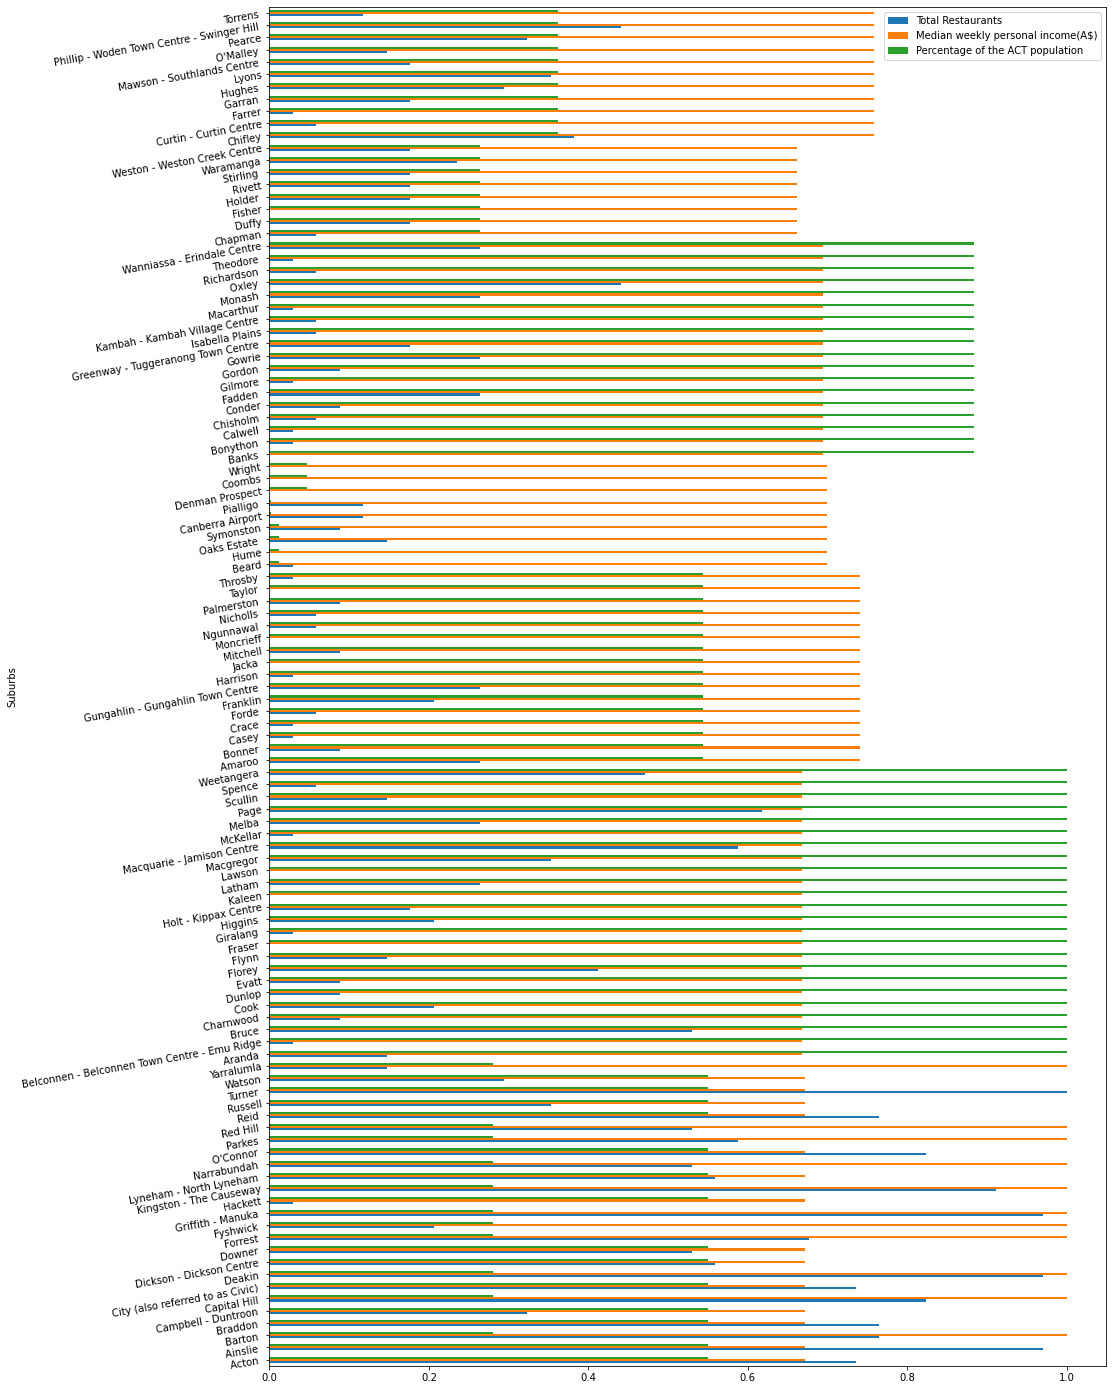

In [81]:
#showing the bar chart of Total Restaurants, Median weekly personal income(A$) and Percentage of the ACT population foe each suburb
import matplotlib.pyplot as plt
df_max_scaled.plot(x="Suburbs", y=["Total Restaurants", "Median weekly personal income(A$)", "Percentage of the ACT population"], kind="barh", rot=10, fontsize=10,figsize=(15, 25))
plt.show()

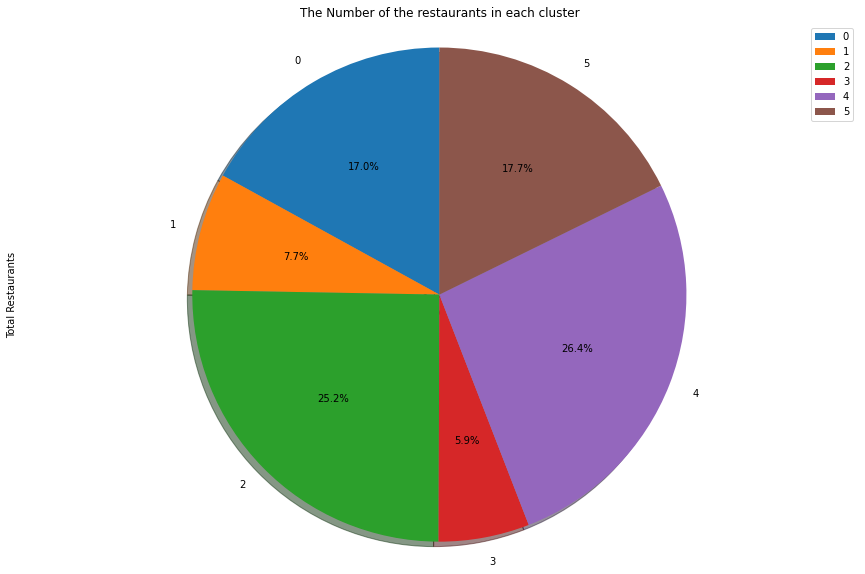

In [82]:

#showing the bar chart of Total Restaurants in each cluster
import matplotlib.pyplot as plt
venues_merged.groupby(['Cluster Labels']).sum().plot(kind='pie', y='Total Restaurants',
                            figsize=(15, 10),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
plt.title("The Number of the restaurants in each cluster")
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

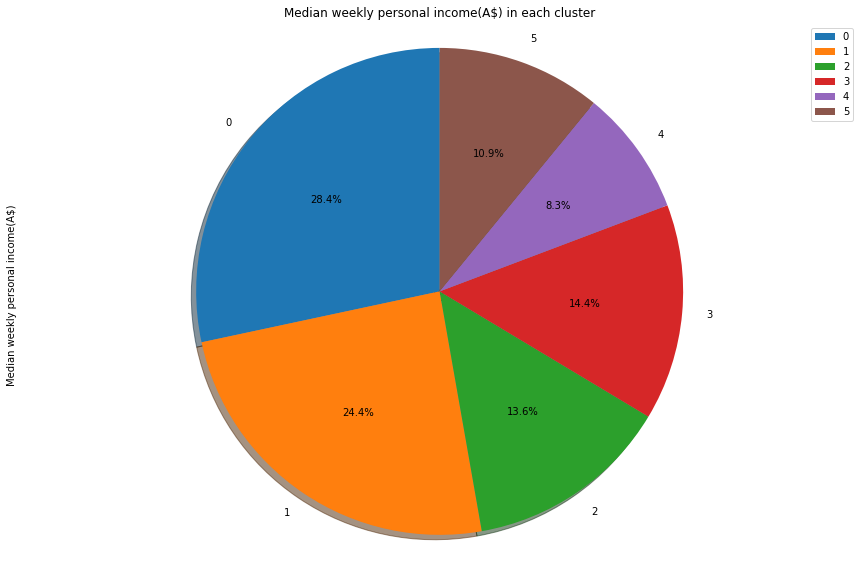

In [83]:
venues_merged.groupby(['Cluster Labels']).sum().plot(kind='pie', y='Median weekly personal income(A$)',
                            figsize=(15, 10),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
plt.title("Median weekly personal income(A$) in each cluster")
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

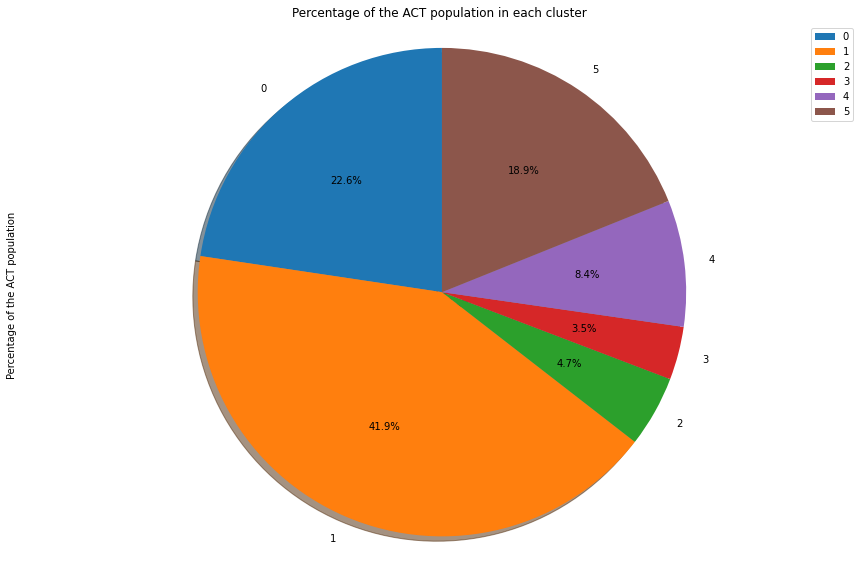

In [84]:
venues_merged.groupby(['Cluster Labels']).sum().plot(kind='pie', y='Percentage of the ACT population',
                            figsize=(15, 10),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
plt.title("Percentage of the ACT population in each cluster")
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [103]:

# drop duplicated restaurants and keep the most expensive one
r_map = (df_final.sort_values(['Total Restaurants'], ascending=[0])
             .drop_duplicates(subset=['Suburbs']))

# create ColumnDataSource
cds = ColumnDataSource(r_map)

# customize hover tool
hover = HoverTool(tooltips=[('districs', '@districs'),
                            ('Suburbs', '@Suburbs'),
                            ('Total Restaurants', '@Total Restaurants'),
                            ("Median weekly personal income(A$)", "@Median weekly personal income(A$)")],
                  mode='mouse')

# UPPER FIGURE
# initialize a figure
up = figure(title='Location of Restaurants in Canberra',
           plot_width=780, plot_height=360,
           x_axis_location=None, y_axis_location=None, 
           tools=['pan', 'wheel_zoom', 'tap', 'reset', 'crosshair', hover])

# overlap map
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

output_file("tile.html")

tile_provider = get_provider(CARTODBPOSITRON)

# create color mapper
mapper = CategoricalColorMapper(factors=r_map.districs.unique(), 
                                palette=Category20b[20]+Category20c[20]+Spectral[4])

# add restaurant location
scatter = up.circle('x', 'y', source=cds, size='dot_size',
                    color={'field': 'state','transform': mapper}, alpha=.5,
                    selection_color='black',
                    nonselection_fill_alpha=.1,
                    nonselection_fill_color='gray',)
                  

# BOTTOM FIGURE
# initialize a figure
down = figure(title='Number of Restaurants in each districs (Click bar below)',
              x_range=r_map.districs.unique(),
              plot_width=780, plot_height=200,
              tools=['tap', 'reset'])

# add restaurant counts
down.vbar(x='districs', top='Total Restaurants', source=cds, width=.7,
            color={'field': 'districs','transform': mapper},
            selection_color='black',
            nonselection_fill_alpha=.1,
            nonselection_fill_color='gray',)


# set graph properties
down.xgrid.grid_line_color = None
down.xaxis.major_label_orientation = 'vertical'
down.xaxis.axis_label = 'Districs'
down.yaxis.axis_label = 'Count'
p = gridplot([[up], [down]], toolbar_location='left',)

# show the plot
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "state", key "line_color" value "state", key "size" value "dot_size" [renderer: GlyphRenderer(id='1373', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "state", key "line_color" value "state", key "size" value "dot_size" [renderer: GlyphRenderer(id='1373', ...)]


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    ca-certificates-2021.1.19  |       h06a4308_0         121 KB
    certifi-2020.12.5          |   py36h06a4308_0         140 KB
    dbus-1.13.18               |       hb2f20db_0         504 KB
    expat-2.2.10               |       he6710b0_2         153 KB
    gst-plugins-base-1.14.0    |       hbbd80ab_1         4.8 MB
    gstreamer-1.14.0           |       h28cd5cc_2         3.2 MB
    iniconfig-1.1.1            |     pyhd3eb1b0_0           8 KB
    joblib-1.0.1               |     pyhd3eb1b0_0         208 KB
    libgfortran-ng-7.3.0       |       hdf63c60_0        1006 KB
    matplotlib-3.3.4           |   py36h06a4308_0     

In [ ]:
y

In [ ]:
[y]

In [ ]:
# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure